#        <center> Zomato Restaurants Data Analysis!</center> 


## Introduction

This is an Exploratory Data Analysis project on Zomato Banglore restaurants.

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as:

• Location of the restaurant
• Approx Price of food
• Theme based restaurant or not
• Which locality of that city serves that cuisines with maximum number of restaurants
• The needs of people who are striving to get the best cuisine of the neighborhood
• Is a particular neighborhood famous for its own kind of food.








The most powerful tools for data analysis used in this project are the packages `Numpy` and `Pandas`, and to visualize and
explore the data: `Matplotlib`,and `Seaborn`. All of these tools were meaningfully and efficiently taught 
in the course "Data Analysis with Python: Zero to Pandas" given by Jovian in partnership with freeCodeCamp.





### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

We are downloading the data set form Kaggle Website

Opendatasets allows us to download a data set directly through a URL into the Jupyter notebook

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants?select=zomato.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jashshah2103
Your Kaggle Key: ········


  0%|          | 0.00/89.0M [00:00<?, ?B/s]

100%|██████████| 89.0M/89.0M [00:01<00:00, 68.8MB/s]


The dataset has been downloaded and extracted.

In [4]:
data_dir = './zomato-bangalore-restaurants'

In [5]:
import os
os.listdir(data_dir)

['zomato.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zomato-bangalore-restauants" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jashshah2103/zomato-bangalore-restauants" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jashshah2103/zomato-bangalore-restauants


'https://jovian.ai/jashshah2103/zomato-bangalore-restauants'

## Data Preparation and Cleaning

In this step we would prepare dataset for analysis by slicing off the part of data which is not required and we would also
see for noice and inconsistencies in the data and replace it with the proper approximated data 



So first import some python libraries to read and process our data

In [10]:
import numpy as np
import pandas as pd

Let's read our csv file which contain lots of data to analyze using pandas `read_csv` method

In [11]:
raw_data_df=pd.read_csv(data_dir+'/'+'zomato.csv',index_col=False)

In [12]:
raw_data_df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [13]:
print('Our data set contains {} rows and {} columns'.format(raw_data_df.shape[0],raw_data_df.shape[1]))

Our data set contains 51717 rows and 17 columns


let's figure out what are the columns in our dataframe

In [14]:
data_cols=raw_data_df.columns
data_cols

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Now we can drop a few colums which are not usefull to us by using `.drop` 

In [15]:
df=raw_data_df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


`info()` will give us some insights about the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


From above result we come to know that there are few columns like rate,location,rest_type,cuisines,approx_cost which has few null values

Now we check for duplicate values in our data set and if yes we remove them by using `drop_duplicates`


In [109]:
df.drop_duplicates(inplace=True)
df.shape

(51040, 11)

The number of columns are reduced so we can say the data set had duplicate values

#### Cleaning Rate column

In [18]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Removing "NEW" ,"-" and "/5" from the rate column

In [19]:
def cleanRate(value):
    if(value=='NEW' or value=='-'):
        return np.nan 
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
df['rate']=df['rate'].apply(cleanRate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [20]:
df.rate.isnull().sum()

10019

#### Replacing the null values in rate column with mean

In [21]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df.rate.isnull().sum()

0

#### Dropping Null values 

In [22]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### Editing some column names

In [23]:
df.rename(columns={'approx_cost(for two people)':'twopplcost','listed_in(type)':'type'},inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,twopplcost,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [25]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### Dropping `listed_in(city)` column

In [26]:
df=df.drop(['listed_in(city)'])


KeyError: "['listed_in(city)'] not found in axis"

In [27]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,twopplcost,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### Removing `,` from twopplcost

In [28]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
df['twopplcost']=df['twopplcost'].apply(handlecomma)
df['twopplcost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [29]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Food Court, Beverage Shop         2
Bakery, Food Court                2
Cafe, Food Court                  2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [30]:
rest_types=df['rest_type'].value_counts(ascending=False)

In [31]:
rest_types_Lessthan1k=rest_types[rest_types<1000]
rest_types_Lessthan1k

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Food Court, Beverage Shop       2
Bakery, Food Court              2
Cafe, Food Court                2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: rest_type, Length: 85, dtype: int64

#### Making Rest type which are less than 1000 to 'others' 

In [32]:
def handleRestType(value):
    if value in rest_types_Lessthan1k:
        return 'others'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(handleRestType)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#### Cleaning Location Column

In [33]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

#### Making location which are less than 300 to 'others' 


In [34]:
location=df['location'].value_counts()
locationless300=location[location<300]
def handleLoc(value):
    if value in locationless300:
        return 'others'
    else:
        return value
    
df['location']=df['location'].apply(handleLoc)
df['location'].value_counts()


BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

#### Cleaning Cuisines Column

In [35]:
df['cuisines'].value_counts()

North Indian                                    2852
North Indian, Chinese                           2351
South Indian                                    1820
Biryani                                          903
Bakery, Desserts                                 898
                                                ... 
Fast Food, Burger, Beverages, Ice Cream            1
Maharashtrian, Mughlai, Fast Food                  1
Mughlai, North Indian, Kebab, Rolls, Chinese       1
Modern Indian, North Indian                        1
North Indian, Beverages, Juices                    1
Name: cuisines, Length: 2704, dtype: int64

#### Making cuisines which are less than 100 to 'others' 


In [36]:
cuisines=df['cuisines'].value_counts()
cuisineless100=cuisines[cuisines<100]
def handleCuisines(value):
    if value in cuisineless100:
        return 'others'
    else:
        return value
    
df['cuisines']=df['cuisines'].apply(handleCuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
North Indian, Chinese, Seafood           102
Italian, Pizza                           102
Name: cuisines, Length: 70, dtype: int64

In [110]:
import jovian

In [111]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jashshah2103/zomato-bangalore-restauants" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jashshah2103/zomato-bangalore-restauants


'https://jovian.ai/jashshah2103/zomato-bangalore-restauants'

## Exploratory Analysis and Visualization

Lets start exploring our data set



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [39]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1.Count Plot of various location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

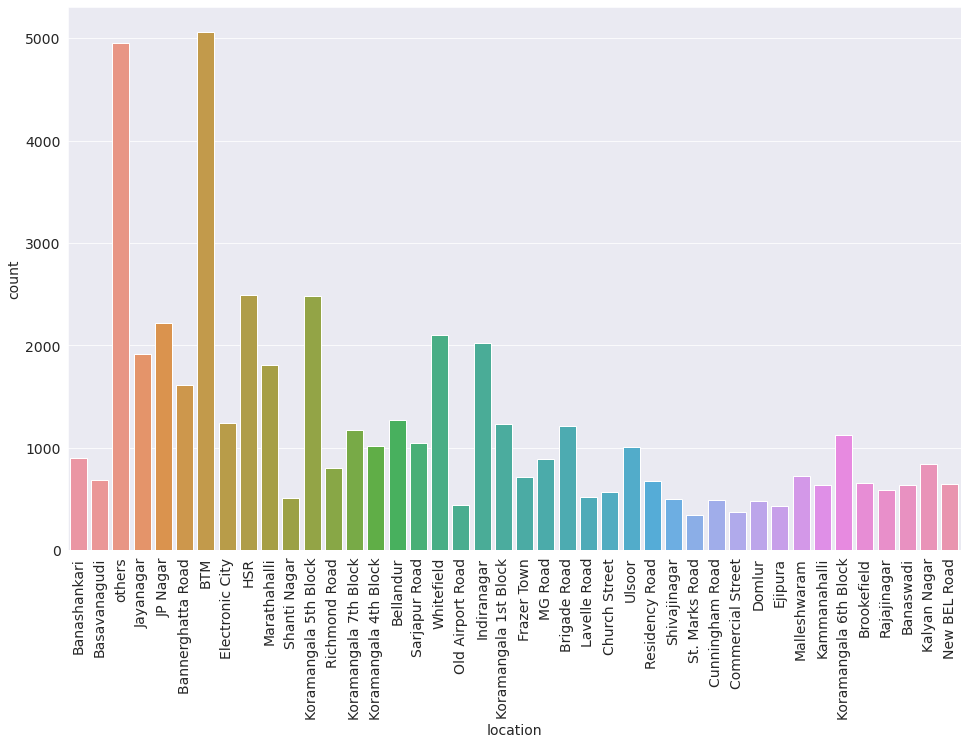

In [40]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation=90)

The above graph represents the number of restaurants in specific locations.
From this graph we can say that BTM has maximum number of restaurants i.e `5056`

### 2.Online ordering 

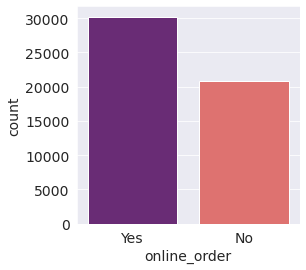

In [41]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df['online_order'],palette='magma')

The above graph represents the number of restaurents having and not having online order facility.
From the graph we can say that approximately 30000 restaurants have online order facility and around 

### 3.Book Table

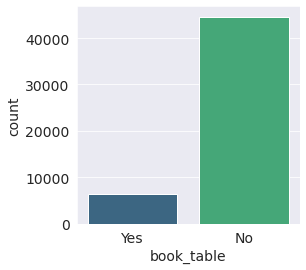

In [52]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df.book_table,palette='viridis')

The above graph represents the number of restaurants having and not having book table facility.
From this graph we can say that maximum restaurants don't have this facility.

### 4. Rate vs Online order 

Text(0.5, 1.0, 'Rate vs Online order')

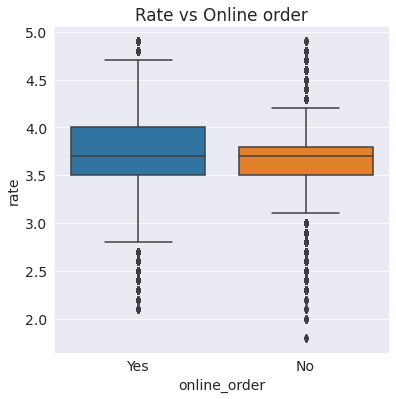

In [54]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.title('Rate vs Online order')

The above box plot represents the ratings of restaurants which have and do not have online ordering facility.From this graph we can say that the median rating for both the type of restaurants is same but more number of restaurants having online order facility have rating on higher side

### 5.Rate vs Book table

<AxesSubplot:xlabel='book_table', ylabel='rate'>

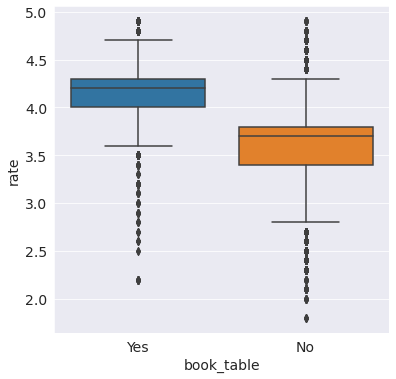

In [57]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)

The above graph represents the rating of restaurants having and not having book table facility. From this graph we can say that  restaurants having book table facility have better average ratings than the restaurants which don't.

## Asking and Answering Questions

We've already gained several insights about the Zomato retaurants in Banglore by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.



#### Q1: Which location has maximum number of restaurants with online ordering facility? 

Text(0, 0.5, 'Count')

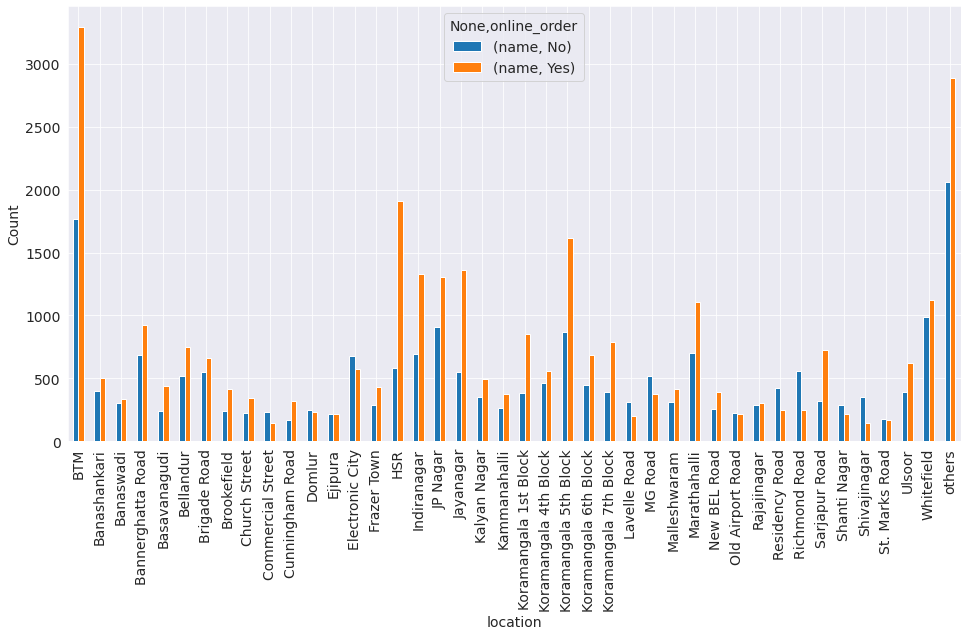

In [65]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1.plot(kind='bar',figsize=(16,8))
plt.ylabel('Count')

Ans-> `BTM` location have maximum number of restaurants with online ordering facility

#### Q2: Which location has maximum number of restaurants with book table facility? 

Text(0, 0.5, 'Count')

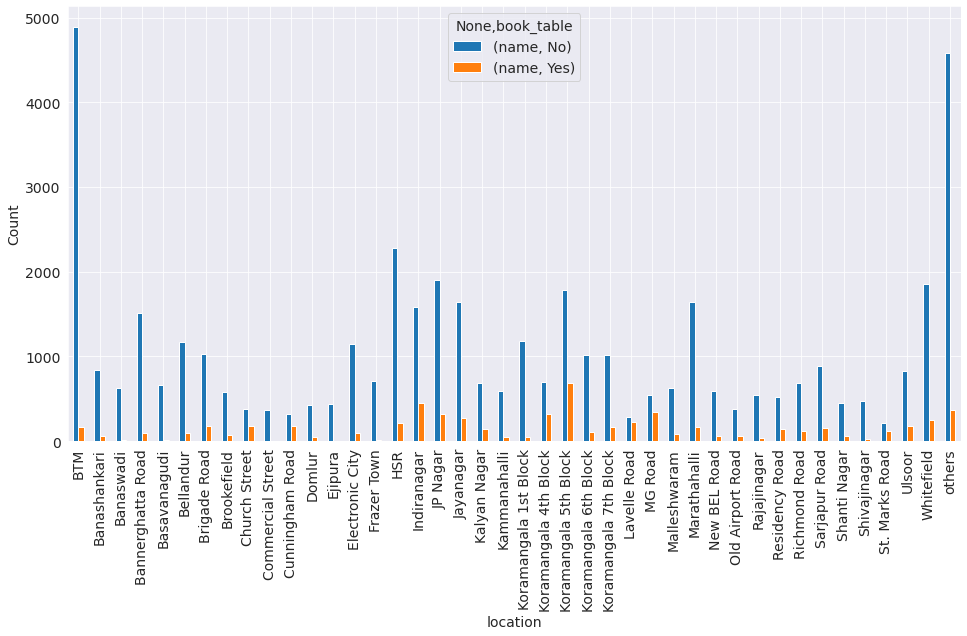

In [67]:
df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_book.csv')
df2=pd.read_csv('location_book.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2.plot(kind='bar',figsize=(16,8))
plt.ylabel('Count')

Ans-> `Koramangla 5th block` has maximum number of restaurants with book table facility.

#### Q3: Which types of restaurants have higher ratings? 

Text(0.5, 1.0, 'Rate vs Type')

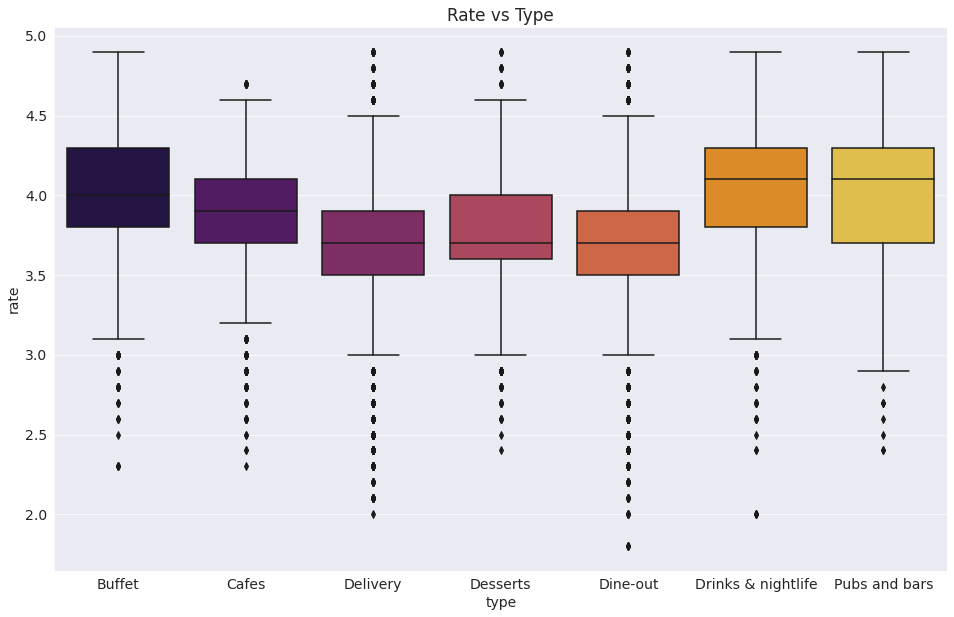

In [69]:
plt.figure(figsize=(16,10))
sns.boxplot(x='type',y='rate',data=df,palette='inferno')
plt.title('Rate vs Type')

Ans-> `Pubs and bars` and `Drinks & nightlife` types of restaurants have higher ratings.

#### Q4: Which location has maximum number of restaurants with delivery type? 

Text(0, 0.5, 'Count')

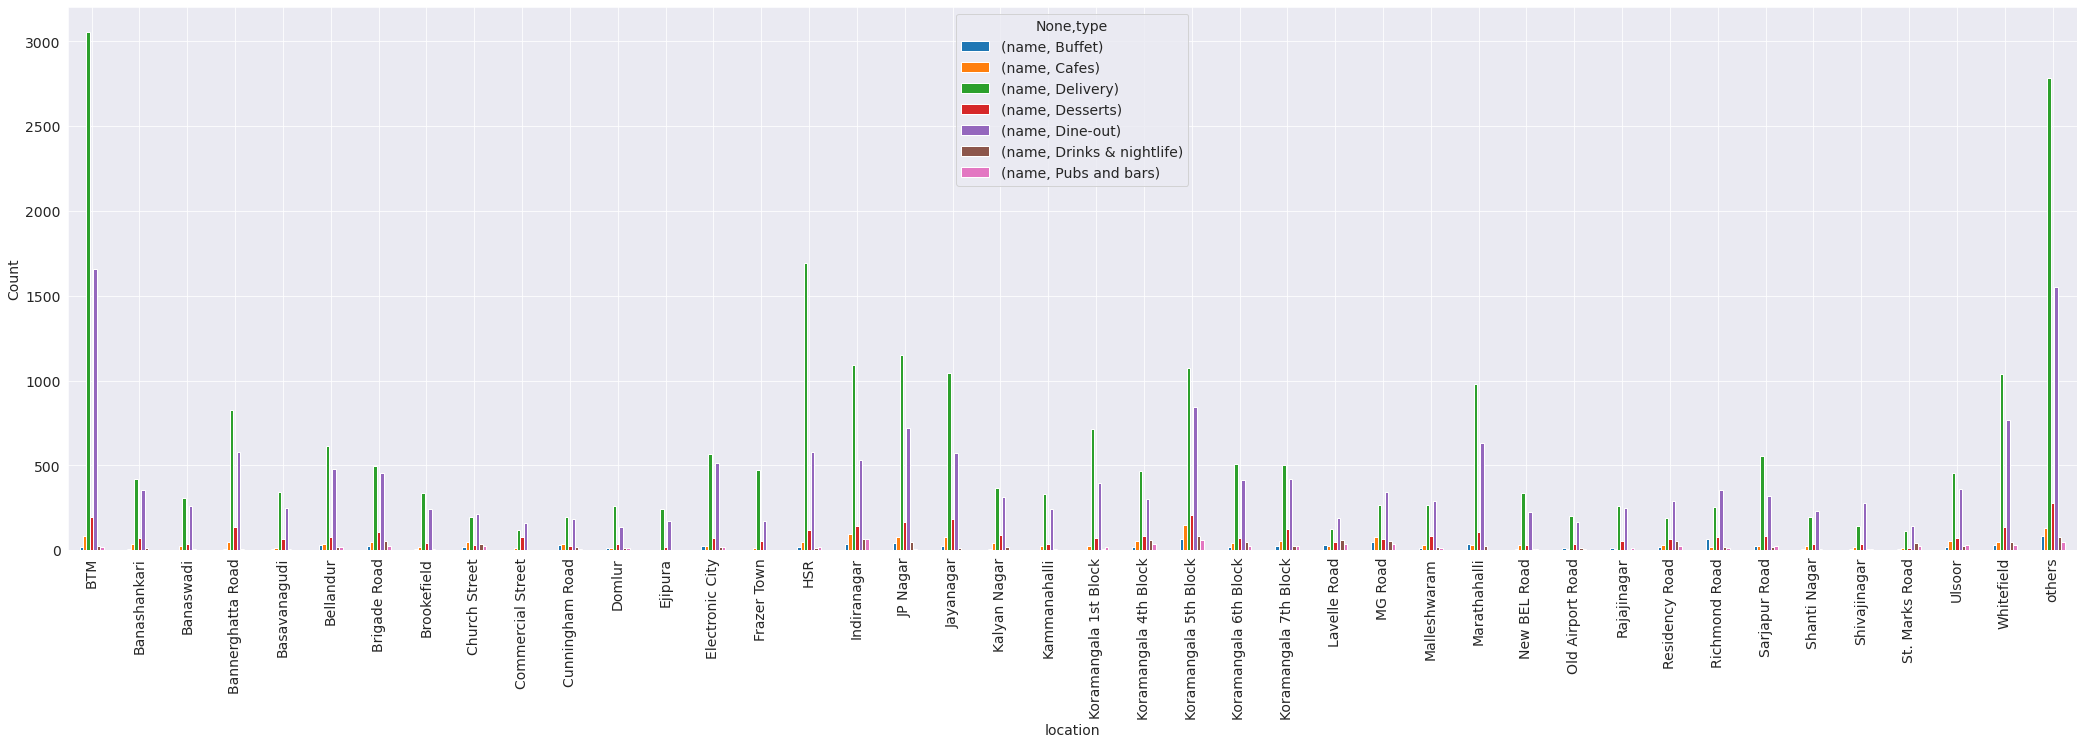

In [81]:
df3=df.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['type'],fill_value=0,aggfunc=np.sum)
df3.plot(kind='bar',figsize=(36,10))
plt.ylabel('Count')

Ans-> BTM has maximum restaurants with delivery type restaurants.

#### Q5: Which location has restaurants with maximum aggregate votes? 

In [45]:
df4=df[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

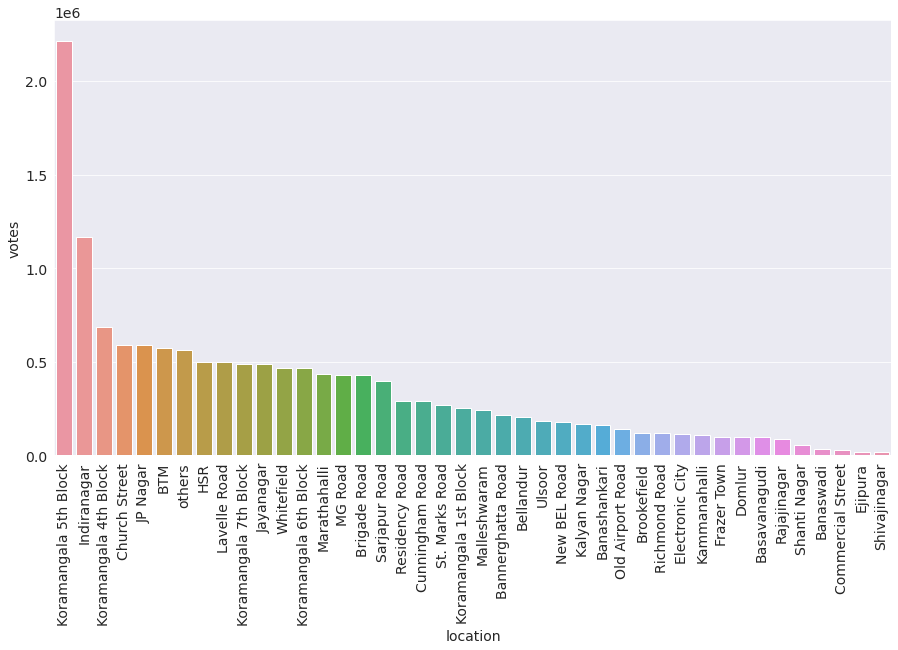

In [84]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index,y=df5['votes'])
plt.xticks(rotation=90)

Ans-> `Koramangala 5th Block` has restaurants with maximum aggeregate votes

Let us save and upload our work to Jovian before continuing

In [93]:
import jovian

In [94]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jashshah2103/zomato-bangalore-restauants" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jashshah2103/zomato-bangalore-restauants


'https://jovian.ai/jashshah2103/zomato-bangalore-restauants'

## Inferences and Conclusion

In this project we explored and analysed the Zomato Banglore restaurants data set which we got from kaggle.

1. The data set was downloaded from kaggle into Jupyter notebook.
2. Data set was cleaned by performing various operations
3. Different types of visualization was carried out on the data set.
4. Finally some questions were answered with the help of graphs.

#### Some Inferences which could be drawn are as follows:-

- BTM has max number of restaurents so the competition is very high here so if we are planning to open a new restaurant this   location shuld be avoided
- Maximum restaurants have online food ordering facility.
- Maximum restaurants don't have book table facility.
- The restaurants having book table facility or online order facility have higher ratings.
- Pubs and bars and Drinks & nightlife types of restaurants have higher ratings.
- Koramangala 5th Block has restaurants with maximum aggeregate votes.
- BTM has maximum restaurants with delivery type restaurants.
- Koramangla 5th block has maximum number of restaurants with book table facility.



In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "jashshah2103/zomato-bangalore-restauants" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/jashshah2103/zomato-bangalore-restauants


'https://jovian.ai/jashshah2103/zomato-bangalore-restauants'

## References and Future Work

#### Future work:-
- We can find the perfect combination of the aspects and accordingly open a restaurants by analyzing the data set carefully.
- We can know about the recent trends in the resturant industry.
- A proper detailed information can be drawn which would help people to select best restaurant in the specific locality.

#### Here is the list of some references:-
- Zomato Banglore Restaurants: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants?select=zomato.csv
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- opendatasets Python library: https://github.com/JovianML/opendatasets
- Jupyter NoteBook Markdown: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

In [114]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>